In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree

plt.style.use("fast")


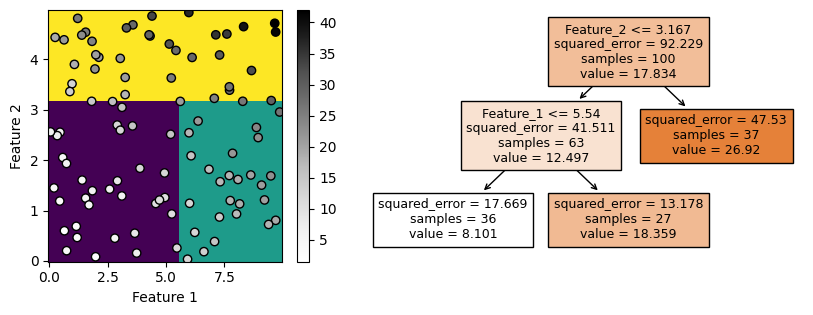

In [2]:
np.random.seed(42)

num_samples = 100

feature1 = np.random.rand(num_samples) * 10
feature2 = np.random.rand(num_samples) * 5

y = 2 * feature1 + feature2**2 + np.random.randn(num_samples)

X = np.column_stack((feature1, feature2))

regression_tree = DecisionTreeRegressor(max_depth=2, min_samples_leaf=20)

regression_tree.fit(X, y)

feature_1, feature_2 = np.meshgrid(
    np.linspace(X[:, 0].min(), X[:, 0].max()), np.linspace(X[:, 1].min(), X[:, 1].max())
)

grid = np.vstack([feature_1.ravel(), feature_2.ravel()]).T

y_pred = np.reshape(regression_tree.predict(grid), feature_1.shape)

fig, ax = plt.subplots(1, 2, figsize=(8.25, 3.25), width_ratios=[1, 1.5])

plot_tree(
    regression_tree,
    feature_names=["Feature_1", "Feature_2"],
    ax=ax[1],
    rounded=False,
    filled=True,
    fontsize=9,
)

display = DecisionBoundaryDisplay(xx0=feature_1, xx1=feature_2, response=y_pred)

display.plot(ax=ax[0], plot_method="pcolormesh")
scatt = ax[0].scatter(X[:, 0], X[:, 1], c=y, cmap="Greys", edgecolors="black", label=y)
fig.colorbar(scatt, ax=ax[0])
ax[0].set_xlabel("Feature 1")
ax[0].set_ylabel("Feature 2")
plt.tight_layout()
plt.savefig("regtree.pdf", bbox_inches="tight")
plt.show()
